<a href="https://colab.research.google.com/github/Jessie-Willow/Generic-templates-for-lab-anal-JW/blob/main/11_3_orange(JW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as optimize
import scipy.stats as stats
UB=9.2740100783e-24
h=6.62607015e-34
Vr=(0.75,1,1.5)
Vr_err=(0.01,0.01,0.01)
T=(0.32,0.48,0.79)
x=np.array(T)
y=np.array(Vr)*1e10
y_err=np.array(Vr_err)*5e10


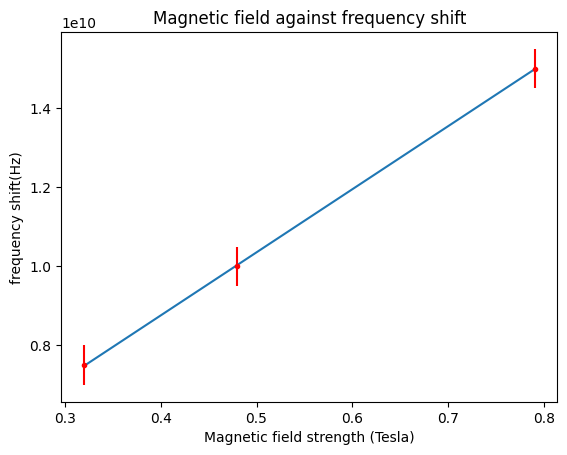

In [ ]:
def straight_line(x, m, c):
    y = m * x + c
    return y


dof = len(x) - 2
m_InitialGuess=2e10
c_InitialGuess=1000

popt, pcov = optimize.curve_fit(straight_line, x, y,
                                p0=[m_InitialGuess, c_InitialGuess], sigma=y_err)

m = popt[0]
c = popt[1]
errors = np.sqrt(np.diag(pcov))
m_err = errors[0]
c_err = errors[1]
y_fit = straight_line(x, m, c)

plt.errorbar(x, y, yerr=y_err, fmt='r.')
plt.plot(x, y_fit, marker=None)
plt.xlabel('Magnetic field strength (Tesla)')
plt.ylabel('frequency shift(Hz)')
plt.title('Magnetic field against frequency shift')
plt.show()

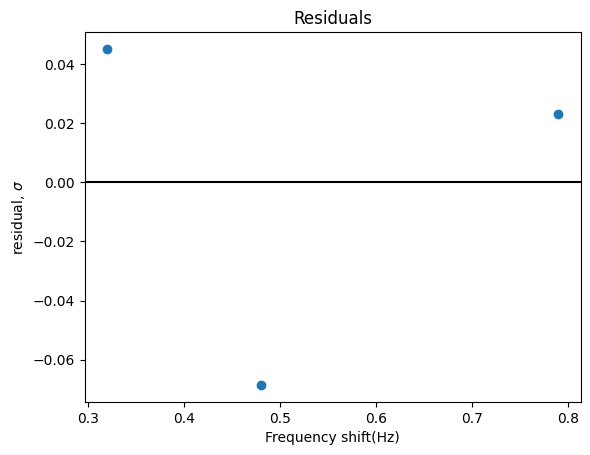

In [ ]:
residuals = y - y_fit
chi_square = np.sum(residuals**2/y_err**2)
plt.scatter(x, residuals/y_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel('Frequency shift(Hz)')
plt.title('Residuals')
plt.show()

In [ ]:
print('The obtained value for the gradient m is:\n')
print(f'{m:.3} +/- {m_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c:.3} +/- {c_err:.2} units')
print(f'The fit yielded \nchi2 = {chi_square:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_square/dof:.3}')
chi2 = stats.chi2
p_value = chi2.sf(chi_square, dof)

print(f'P-value = {p_value:.2}')
print("our value of gj is ",(h*m)/UB, "+/-", (h*m_err)/UB )

The obtained value for the gradient m is:

1.6e+10 +/- 1.3e+08 units

The obtained value for the y-intercept c is:

2.36e+09 +/- 7.1e+07 units
The fit yielded 
chi2 = 0.0073 with 1 degrees of freedom
giving a reduced chi2 of 0.0073
P-value = 0.93
our value of gj is  1.1417873595217598 +/- 0.009030290691407436
